In [1]:
import sys
from pathlib import Path
import pandas as pd

# %pip install -e .

HERE = Path.cwd().resolve()
REPO = HERE.parent
SRC  = REPO / "src"

# make 'boreas' importable from source tree
if (SRC / "boreas").exists():
    sys.path.insert(0, str(SRC))

try:
    from plots import Plots
except ImportError:
    from plots.plots import Plots
    
%matplotlib widget

#### Plot

In [2]:
base_dir = Path("/Users/mvalatsou/PhD/Repos/MR_perplex/OUTPUT/paper_rerun/XUV_filter")

df_superEarth       = pd.read_csv(base_dir / '3H2O_superEarth.csv')
df_subNeptune       = pd.read_csv(base_dir / '3HHe_subNeptune.csv')
df_subNeptune_10H2O = pd.read_csv(base_dir / '3HHe_10H2O_subNeptune.csv')
df_subNeptune_20H2O = pd.read_csv(base_dir / '3HHe_20H2O_subNeptune.csv')
df_subNeptune_50H2O = pd.read_csv(base_dir / '3HHe_50H2O_subNeptune.csv')
df_subNeptune_70H2O = pd.read_csv(base_dir / '3HHe_70H2O_subNeptune.csv')
df_subNeptune_90H2O = pd.read_csv(base_dir / '3HHe_90H2O_subNeptune.csv')

df_superEarth["planet_type"]       = "super-Earths (3% WMF)"
df_subNeptune["planet_type"]       = "sub-Neptunes (3% AMF, H/He)"
df_subNeptune_10H2O["planet_type"] = "sub-Neptunes (10% H2O)"
df_subNeptune_20H2O["planet_type"] = "sub-Neptunes (20% H2O)"
df_subNeptune_50H2O["planet_type"] = "sub-Neptunes (50% H2O)"
df_subNeptune_70H2O["planet_type"] = "sub-Neptunes (70% H2O)"
df_subNeptune_90H2O["planet_type"] = "sub-Neptunes (90% H2O)"

# df_combined = pd.concat([df_subNeptune_10H2O], ignore_index=True) # combine dfs
df_combined = pd.concat([df_superEarth, df_subNeptune, df_subNeptune_10H2O, df_subNeptune_20H2O,
                         df_subNeptune_50H2O, df_subNeptune_70H2O, df_subNeptune_90H2O], 
                        ignore_index=True) # combine dfs
# df_combined.to_csv(base_dir / 'combined.csv', index=False)
print(df_combined.shape)

df         = pd.read_csv(base_dir / 'combined.csv')
df_ok      = df[df["regime"] != "SKIPPED"].copy()
df_skipped = df[df["regime"] == "SKIPPED"].copy()

print(df['planet_type'].unique())
print(f"kept {len(df_ok)} results, skipped {len(df_skipped)} (momentum balance)")

(1790, 47)
['super-Earths (3% WMF)' 'sub-Neptunes (3% AMF, H/He)'
 'sub-Neptunes (10% H2O)' 'sub-Neptunes (20% H2O)'
 'sub-Neptunes (50% H2O)' 'sub-Neptunes (70% H2O)'
 'sub-Neptunes (90% H2O)']
kept 1778 results, skipped 12 (momentum balance)


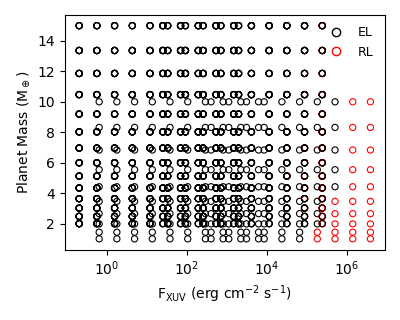

In [3]:
Plots.regime_scatter(df_combined) # to quickly check which regimes we have in our models

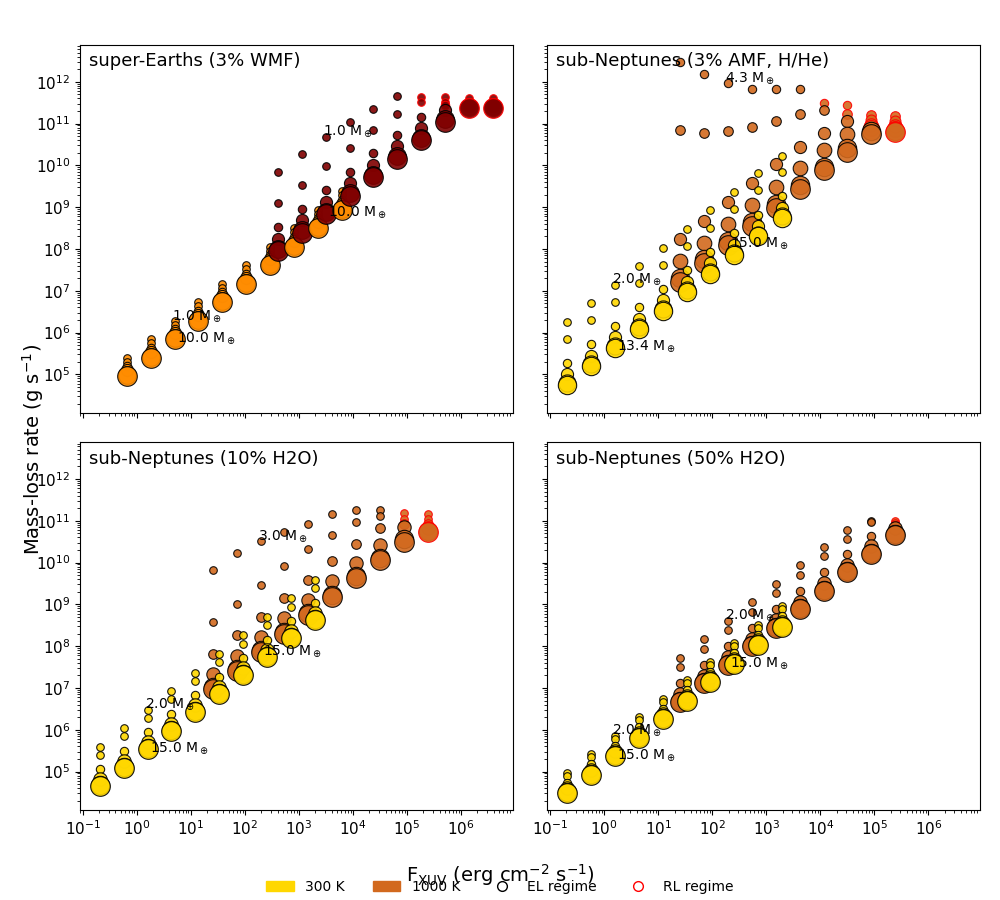

In [4]:
Plots.Mdot_FXUV(df, show_regime=True,
                planet_types=('super-Earths (3% WMF)',
                              'sub-Neptunes (3% AMF, H/He)',
                              'sub-Neptunes (10% H2O)',
                              'sub-Neptunes (50% H2O)'))

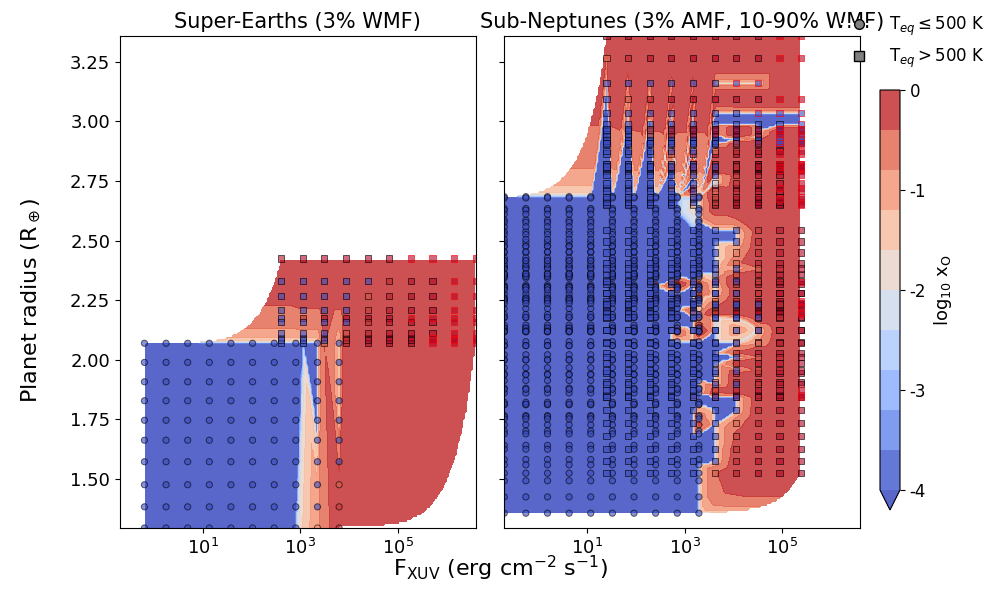

/Users/mvalatsou/PhD/Repos/BOREAS/plots/plots.py:317: RuntimeWarning: divide by zero encountered in log10
  gvals = np.where(xo > 0.0, np.log10(xo), clamp_log - 1.0)
/Users/mvalatsou/PhD/Repos/BOREAS/plots/plots.py:317: RuntimeWarning: divide by zero encountered in log10
  gvals = np.where(xo > 0.0, np.log10(xo), clamp_log - 1.0)


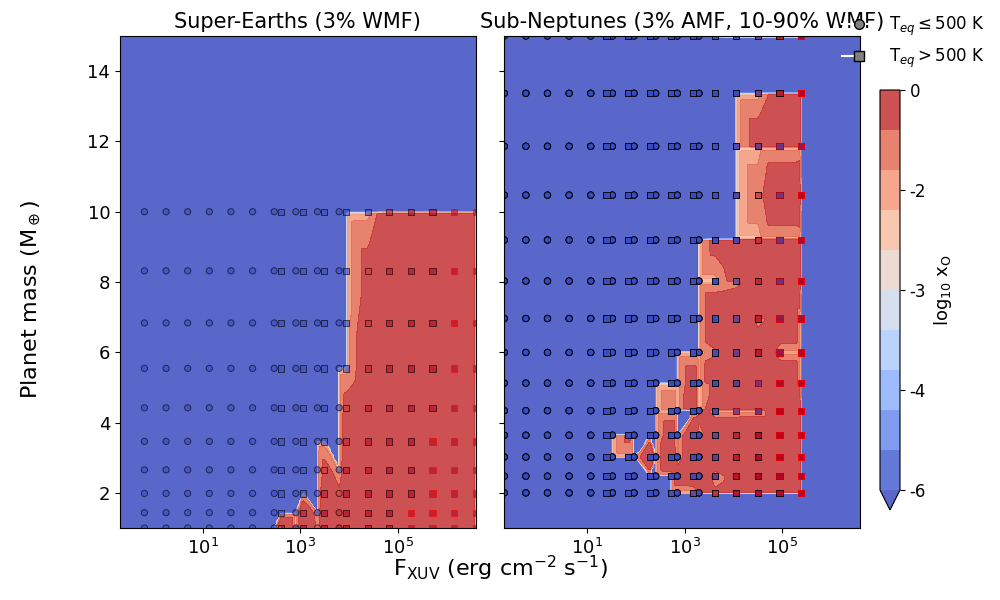

In [5]:
Plots.radius_FXUV_oxygen_contour(df_combined)
Plots.mass_FXUV_oxygen_contour(df_combined)

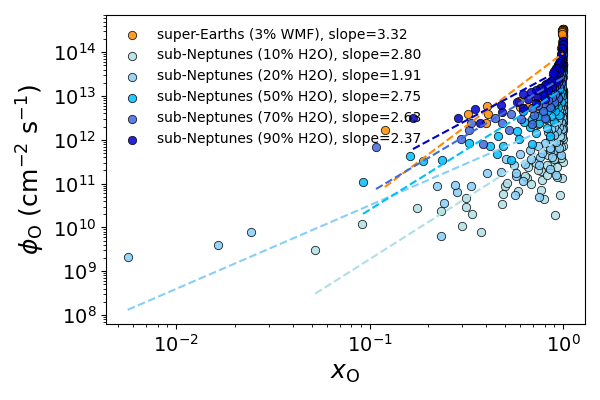

In [6]:
Plots.oxygen_indicators(df_combined)

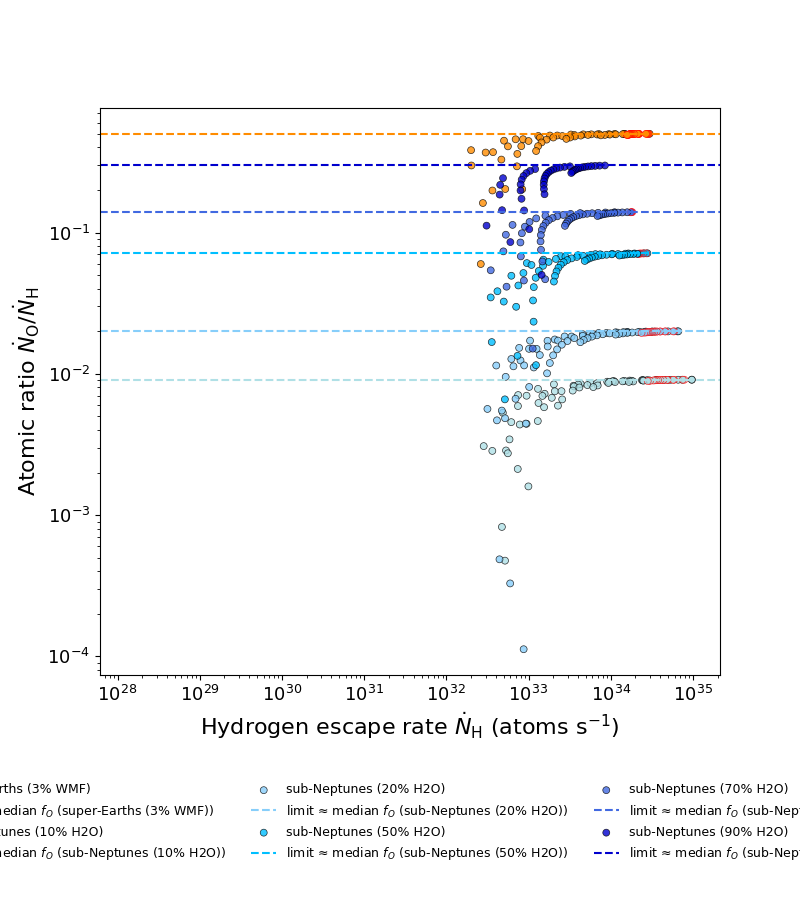

In [7]:
Plots.atomic_escape(df_combined)

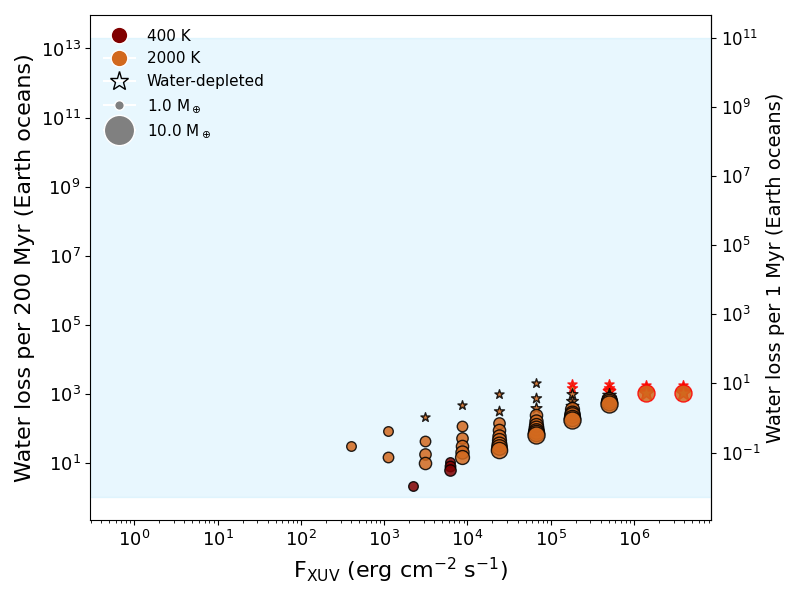

/Users/mvalatsou/PhD/Repos/BOREAS/plots/plots.py:602: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  d['planet_type'].str.contains('(10% H2O|20% H2O)', na=False))


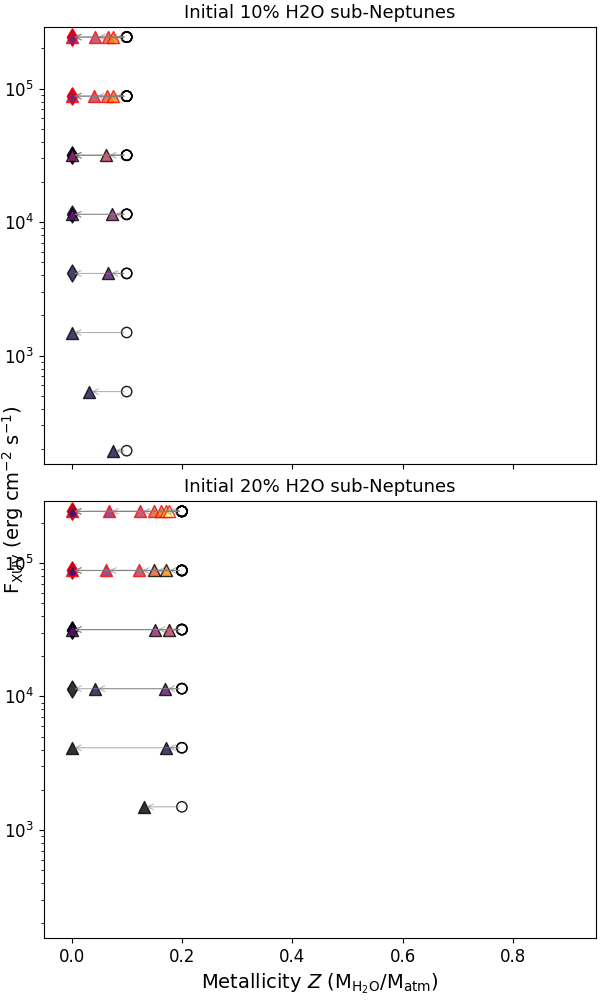

In [8]:
Plots.water_loss(df)
Plots.metallicity_change(df)

### Diagnostics

[diag] dropped zeros (left,right) = (1364,1364)


(<Figure size 1100x450 with 3 Axes>,
 array([<Axes: title={'center': 'Flux identity (H light-major)'}, xlabel='$x_{\\mathrm{O}}$', ylabel='$\\phi_{\\mathrm{O}} / (\\phi_{\\mathrm{H}} f_{\\mathrm{O}})$'>,
        <Axes: title={'center': 'Drag vs diffusion'}, xlabel='$\\phi_{\\mathrm{H}} / F_{\\mathrm{crit}}$', ylabel='$x_{\\mathrm{O}}$'>],
       dtype=object))

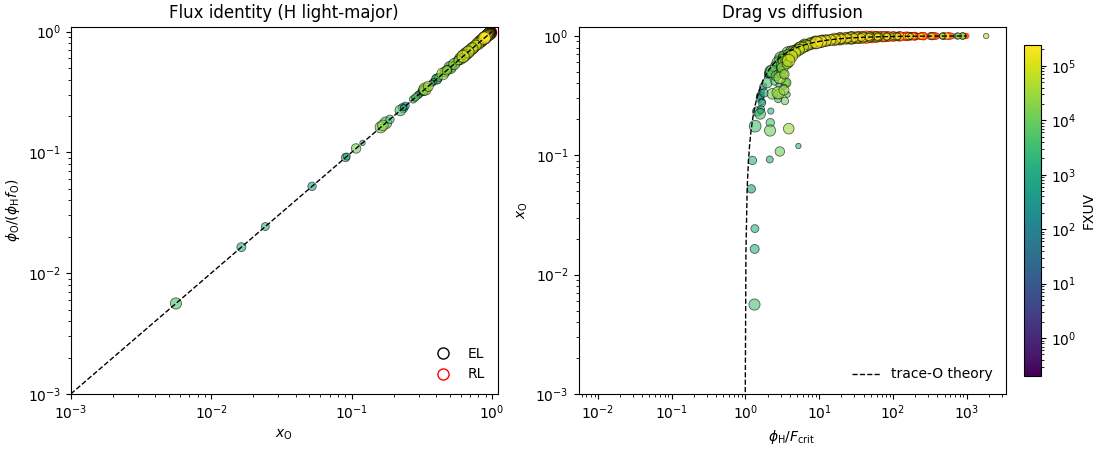

In [9]:
Plots.oxygen_fractionation_diagnostics(df_combined)

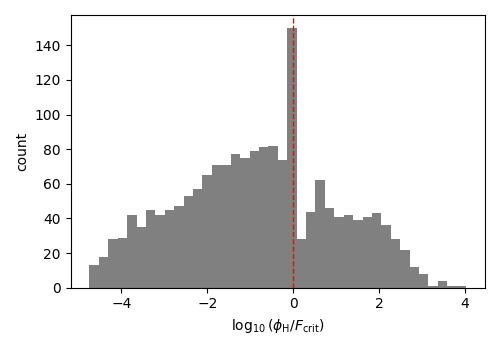

/Users/mvalatsou/PhD/Repos/BOREAS/plots/plots.py:898: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grp = m.groupby(pd.cut(m.lr, bins))


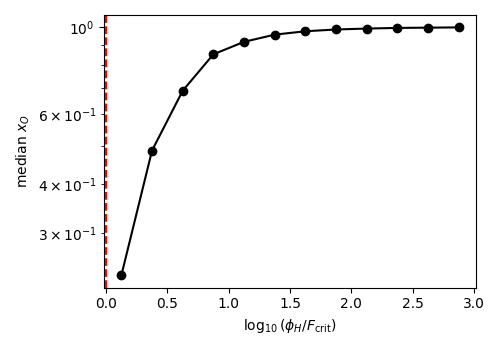

In [10]:
Plots.phiH_Fcrit(df)
Plots.phiH_Fcrit2(df)

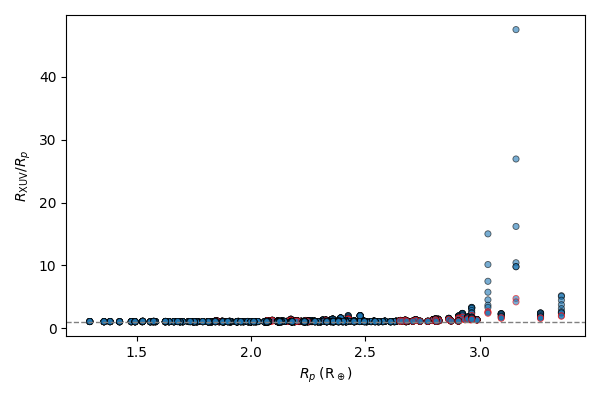

[R_XUV/R_p] percentiles (1,5,25,50,75,95,99%): [1.005 1.008 1.022 1.052 1.15  1.756 3.38 ]
min/max: 1.0049081634547676 47.53606263354445


/Users/mvalatsou/PhD/Repos/BOREAS/plots/plots.py:978: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


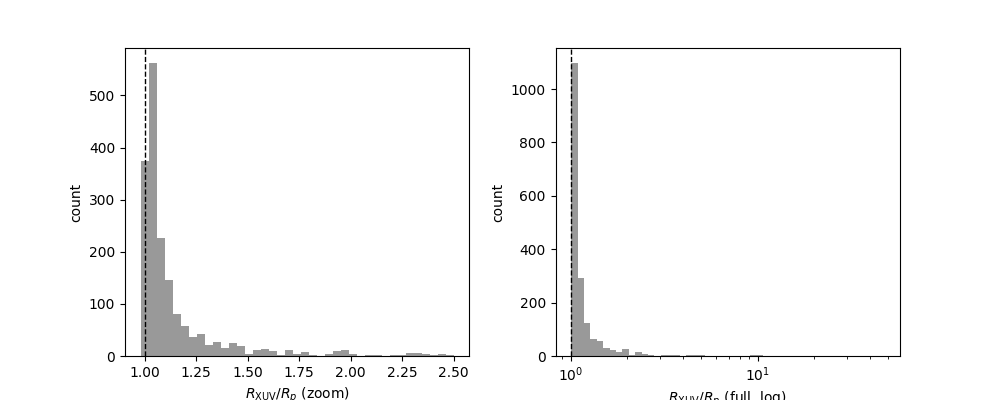

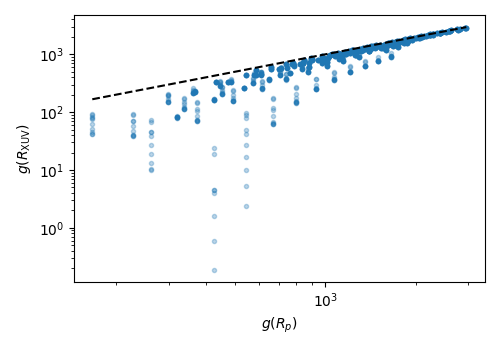

In [11]:
Plots.RXUV_over_Rp_scatter(df)
Plots.RXUV_over_Rp_hist(df)
Plots.g_Rp_RXUV(df)